In [1]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint

[*********************100%%**********************]  11 of 11 completed


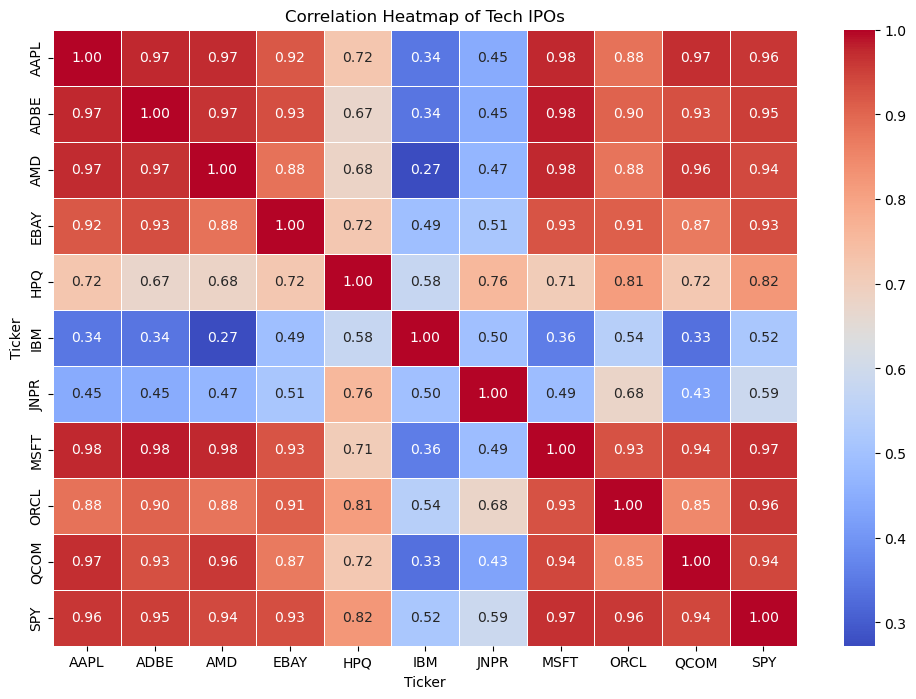

In [27]:
# List of tech IPO stock tickers
tickers = ['AAPL', 'ADBE', 'ORCL', 'EBAY', 'MSFT', 'QCOM', 'HPQ', 'JNPR', 'AMD', 'IBM', 'SPY']

# Download historical data for the stocks
data = yf.download(tickers, start="2018-01-01", end="2022-01-01")['Adj Close']

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Tech IPOs')
plt.show()

In [3]:
# Define the stock tickers
tickers = ["ADBE", "MSFT"]

# Download historical data for both stocks
data = yf.download(tickers, start="2018-01-01", end="2022-01-01")

# Display the data
print(data.head())

[*********************100%%**********************]  2 of 2 completed

Price        Adj Close                  Close                   High  \
Ticker            ADBE       MSFT        ADBE       MSFT        ADBE   
Date                                                                   
2018-01-02  177.699997  80.080917  177.699997  85.949997  177.800003   
2018-01-03  181.039993  80.453606  181.039993  86.349998  181.889999   
2018-01-04  183.220001  81.161720  183.220001  87.110001  184.059998   
2018-01-05  185.339996  82.167976  185.339996  88.190002  185.899994   
2018-01-08  185.039993  82.251816  185.039993  88.279999  185.600006   

Price                         Low                   Open              Volume  \
Ticker           MSFT        ADBE       MSFT        ADBE       MSFT     ADBE   
Date                                                                           
2018-01-02  86.309998  175.259995  85.500000  175.850006  86.129997  2432800   
2018-01-03  86.510002  177.699997  85.970001  178.000000  86.059998  2561200   
2018-01-04  87.660004  

In [4]:
# Calculate the daily returns
returns = data['Adj Close'].pct_change()

# Calculate the spread between the two stocks
spread = returns['ADBE'] - returns['MSFT']

# Calculate the mean and standard deviation of the spread
mean_spread = spread.mean()
std_spread = spread.std()

# Define the upper and lower thresholds
upper_threshold = mean_spread + std_spread
lower_threshold = mean_spread - std_spread

In [5]:
# Signal generation
signals = pd.DataFrame(index=spread.index)
signals['Signal'] = 0

# Generate buy/sell signals
signals['Signal'][spread > upper_threshold] = -1  # Sell KO, Buy PEP
signals['Signal'][spread < lower_threshold] = 1   # Buy KO, Sell PEP

<Figure size 1400x700 with 0 Axes>

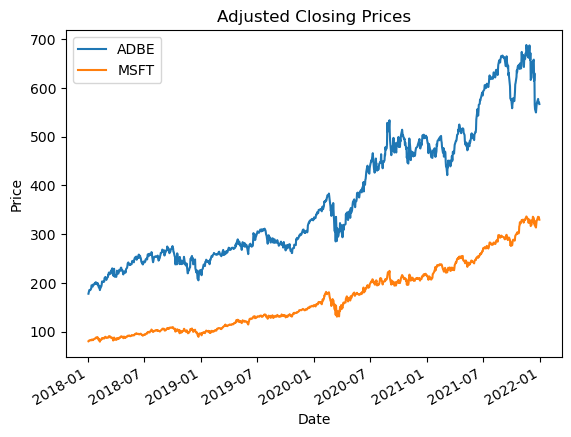

In [6]:
# Plot the adjusted closing prices
plt.figure(figsize=(14, 7))
data['Adj Close'].plot()
plt.title("Adjusted Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(tickers)
plt.show()

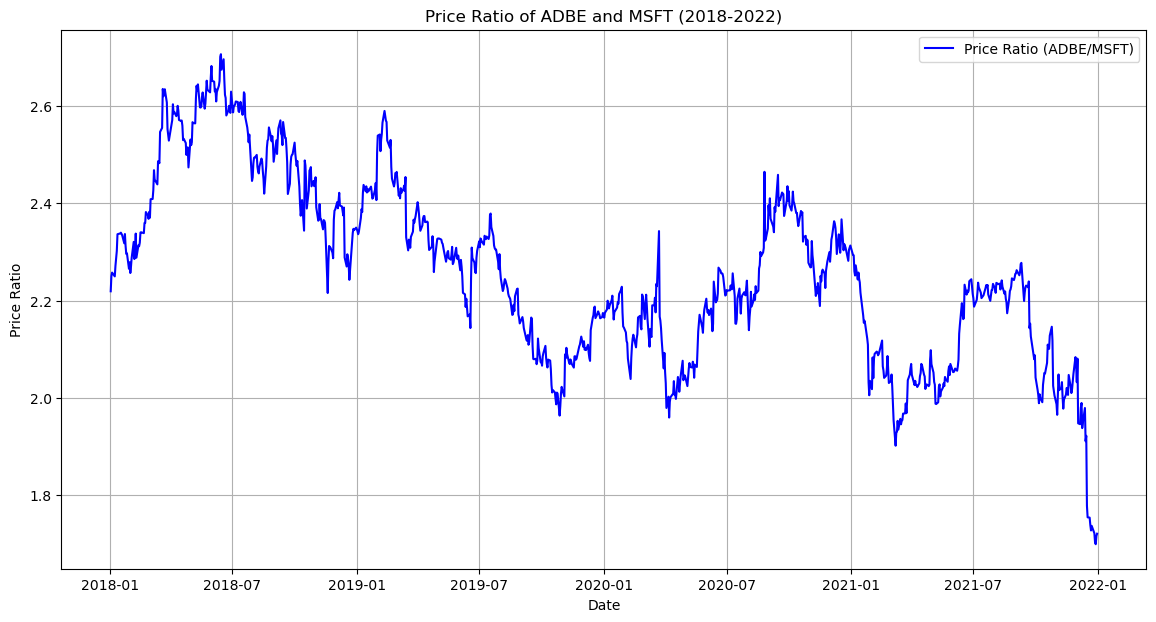

In [7]:
# Calculate the price ratio (adjusted close prices)
data['Price Ratio'] = data['Adj Close']['ADBE'] / data['Adj Close']['MSFT']

# Plot the price ratio
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Price Ratio'], label='Price Ratio (ADBE/MSFT)', color='blue')
plt.title('Price Ratio of ADBE and MSFT (2018-2022)')
plt.xlabel('Date')
plt.ylabel('Price Ratio')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1400x700 with 0 Axes>

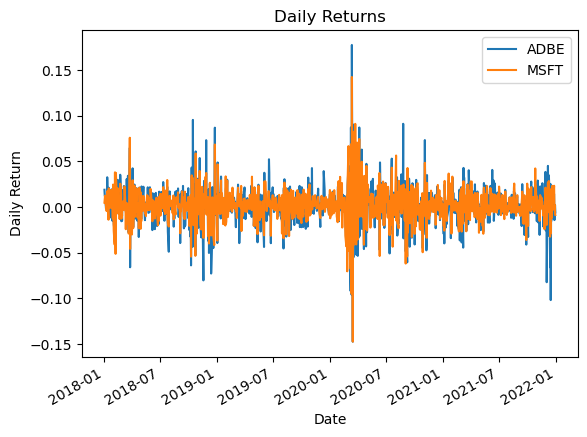

In [8]:
# Plot the daily returns
plt.figure(figsize=(14, 7))
returns.plot()
plt.title("Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend(tickers)
plt.show()

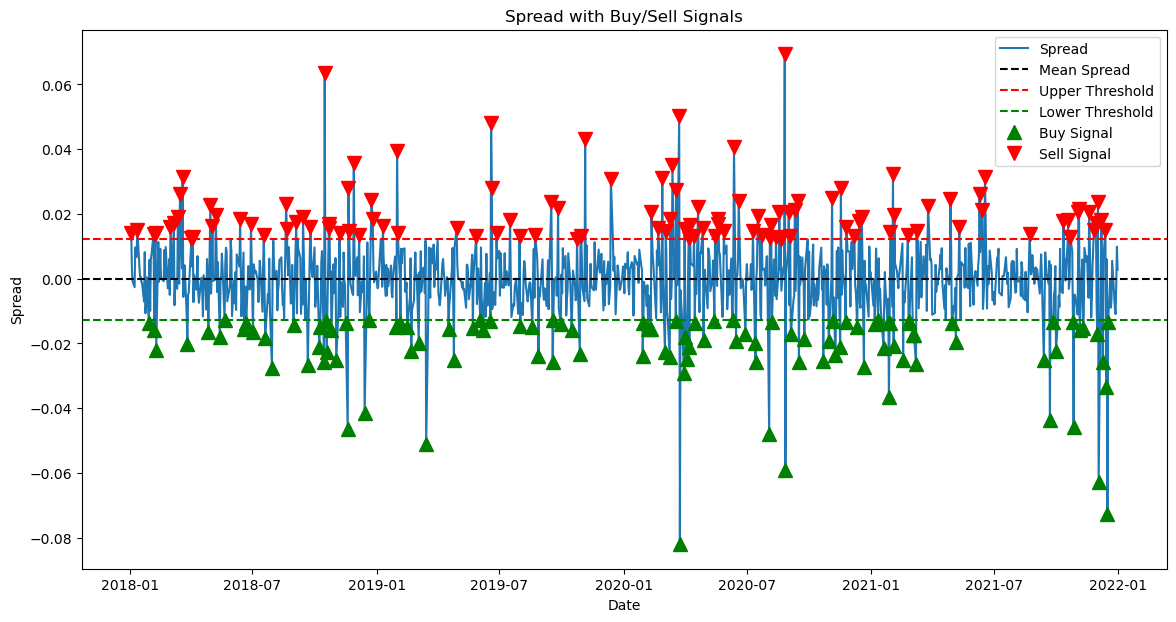

In [9]:
# Plot the spread with thresholds and signals
plt.figure(figsize=(14, 7))
plt.plot(spread.index, spread, label='Spread')
plt.axhline(mean_spread, color='black', linestyle='--', label='Mean Spread')
plt.axhline(upper_threshold, color='red', linestyle='--', label='Upper Threshold')
plt.axhline(lower_threshold, color='green', linestyle='--', label='Lower Threshold')

# Plot buy/sell signals
plt.plot(signals.loc[signals['Signal'] == 1].index, 
         spread[signals['Signal'] == 1], 
         '^', markersize=10, color='g', label='Buy Signal')
plt.plot(signals.loc[signals['Signal'] == -1].index, 
         spread[signals['Signal'] == -1], 
         'v', markersize=10, color='r', label='Sell Signal')

plt.title("Spread with Buy/Sell Signals")
plt.xlabel("Date")
plt.ylabel("Spread")
plt.legend()
plt.show()

In [10]:
# Calculate the price ratio (adjusted close prices)
data['Price Ratio'] = data['Adj Close']['ADBE'] / data['Adj Close']['MSFT']

# Prepare the data for regression model
# We will use lagged values of the price ratio as features
data['Price Ratio Lagged'] = data['Price Ratio'].shift(1)

# Drop the first row since it contains NaN value after shifting
data = data.dropna()


In [11]:
# Correlation analysis
correlation = data['Adj Close']['ADBE'].corr(data['Adj Close']['MSFT'])
print(f'Correlation between ADBE and MSFT: {correlation}')

# Cointegration test
coint_t, p_value, _ = coint(data['Adj Close']['ADBE'], data['Adj Close']['MSFT'])
print(f'Cointegration test p-value: {p_value}')

# Spread calculation
data['Spread'] = data['Adj Close']['ADBE'] - data['Adj Close']['MSFT']

# Z-score calculation
data['Z-Score'] = (data['Spread'] - data['Spread'].mean()) / data['Spread'].std()

Correlation between ADBE and MSFT: 0.9836195187729218
Cointegration test p-value: 0.7005410466094606


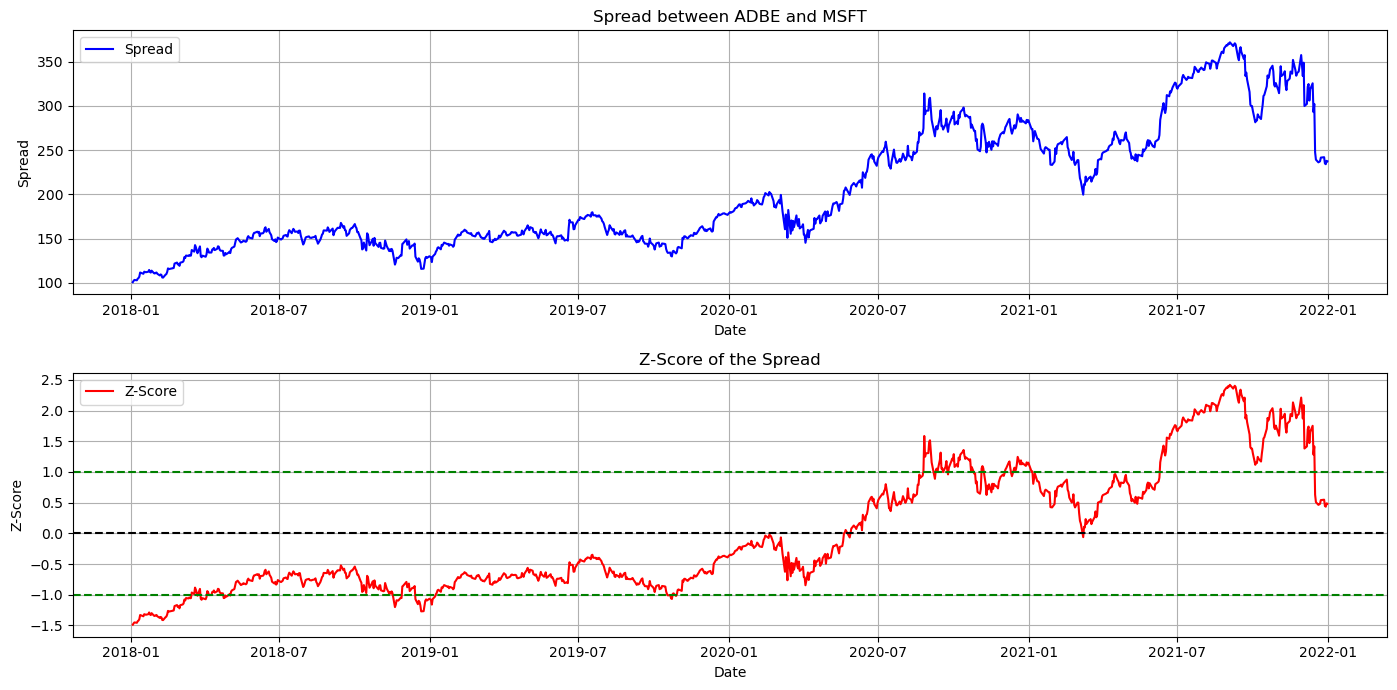

In [12]:
# Plot the spread and Z-score
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Spread'], label='Spread', color='blue')
plt.title('Spread between ADBE and MSFT')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(data.index, data['Z-Score'], label='Z-Score', color='red')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(1, color='green', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.title('Z-Score of the Spread')
plt.xlabel('Date')
plt.ylabel('Z-Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [13]:
# Split the data into training and testing sets
X = data[['Price Ratio Lagged']]
y = data['Price Ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

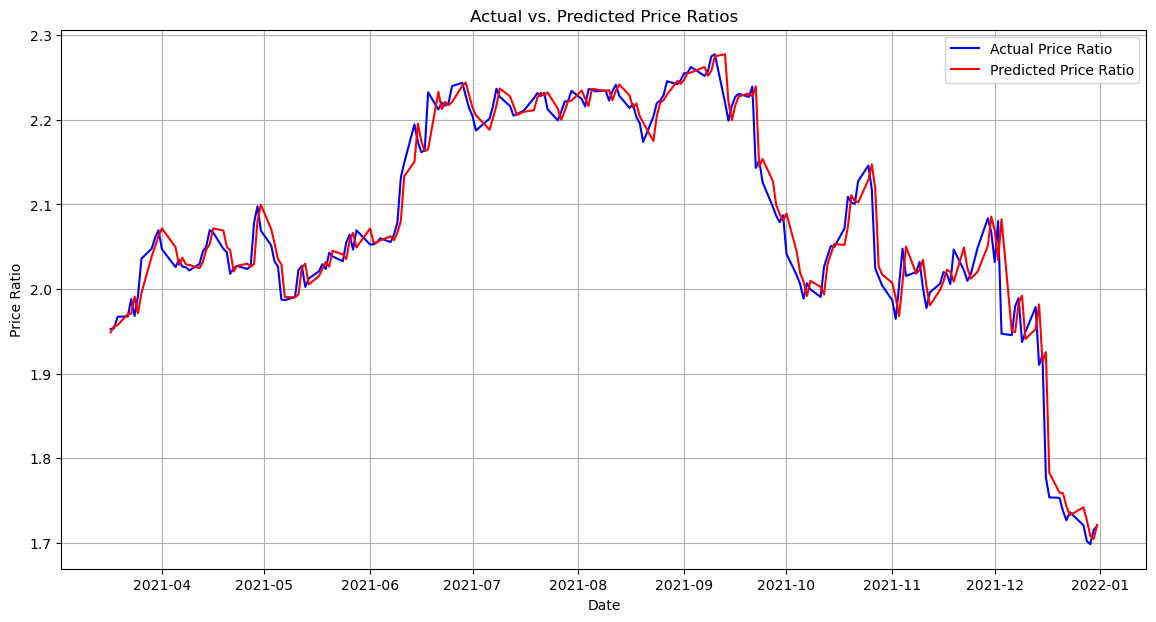

Mean Squared Error: 0.0006815945283718982
R-squared: 0.9587500447320157


In [14]:
# Plot the actual vs. predicted price ratios
plt.figure(figsize=(14, 7))
plt.plot(data.index[len(X_train):], y_test, label='Actual Price Ratio', color='blue')
plt.plot(data.index[len(X_train):], y_pred, label='Predicted Price Ratio', color='red')
plt.title('Actual vs. Predicted Price Ratios')
plt.xlabel('Date')
plt.ylabel('Price Ratio')
plt.legend()
plt.grid(True)
plt.show()

# Print the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

In [15]:
# Define buy and sell signals
data['Signal'] = 0
data.loc[data['Z-Score'] > 1.0, 'Signal'] = -1  # Sell signal
data.loc[data['Z-Score'] < 0.5, 'Signal'] = 1  # Buy signal

# Exiting positions
data['Exit Signal'] = 0
data.loc[(data['Z-Score'] > -0.2) & (data['Z-Score'] < 0.2), 'Exit Signal'] = 1

# Combine signals
data['Position'] = data['Signal']
data['Position'] = data['Position'].replace(to_replace=0, method='ffill')

# Reset position to 0 on exit signal
data.loc[data['Exit Signal'] == 1, 'Position'] = 0


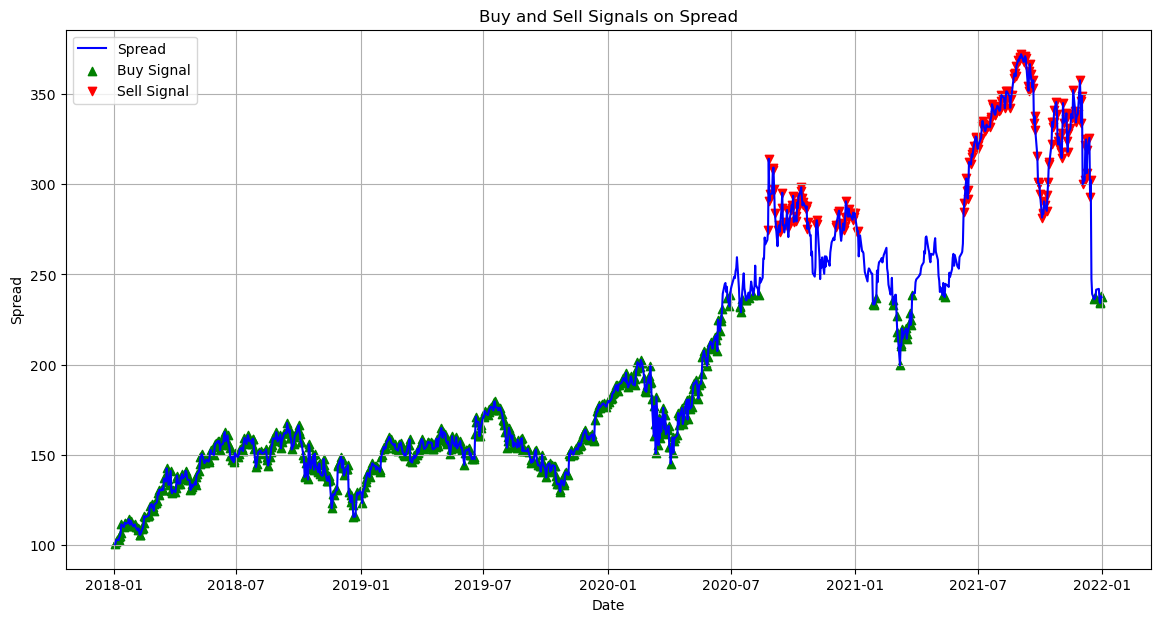

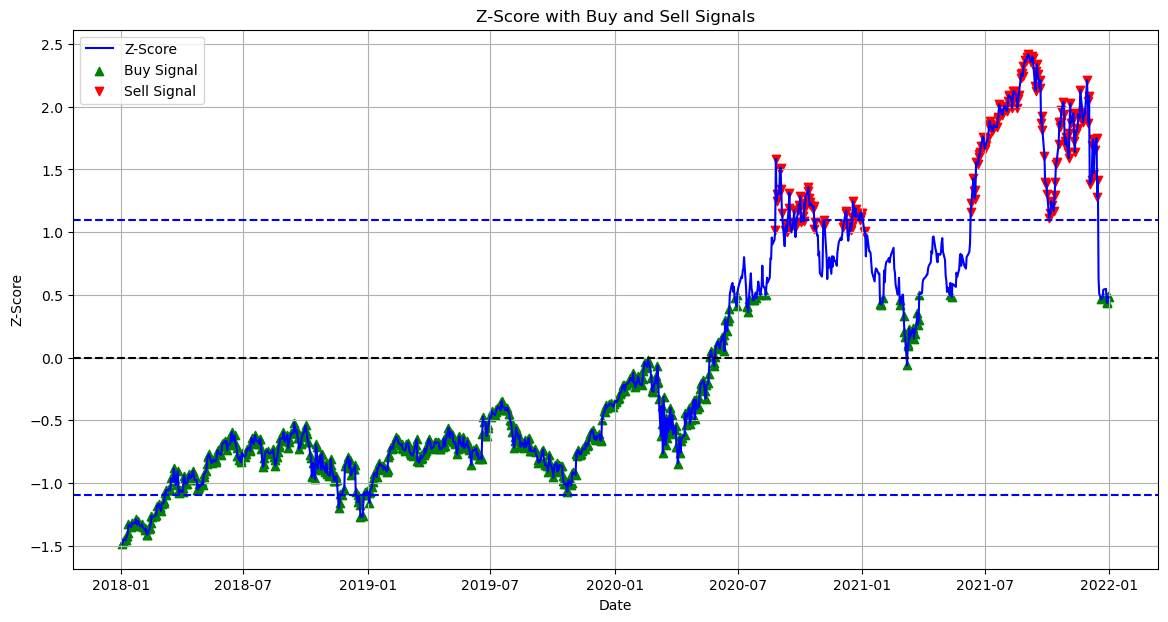

In [16]:
# Plot buy and sell signals
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Spread'], label='Spread', color='blue')
plt.scatter(data.index[data['Signal'] == 1], data['Spread'][data['Signal'] == 1], label='Buy Signal', marker='^', color='green')
plt.scatter(data.index[data['Signal'] == -1], data['Spread'][data['Signal'] == -1], label='Sell Signal', marker='v', color='red')
plt.title('Buy and Sell Signals on Spread')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.grid(True)
plt.show()

# Plot Z-score with buy and sell signals
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Z-Score'], label='Z-Score', color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(1.1, color='blue', linestyle='--')
plt.axhline(-1.1, color='blue', linestyle='--')
plt.scatter(data.index[data['Signal'] == 1], data['Z-Score'][data['Signal'] == 1], label='Buy Signal', marker='^', color='green')
plt.scatter(data.index[data['Signal'] == -1], data['Z-Score'][data['Signal'] == -1], label='Sell Signal', marker='v', color='red')
plt.title('Z-Score with Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Z-Score')
plt.legend()
plt.grid(True)
plt.show()


#  Calculating Returns

In [17]:
# Calculate returns
data['Return'] = data['Adj Close']['ADBE'].pct_change() - data['Adj Close']['MSFT'].pct_change()

# Calculate strategy returns
data['Strategy Return'] = data['Return'] * data['Position'].shift(1)

# Calculate cumulative returns
data['Cumulative Return'] = (1 + data['Return']).cumprod()
data['Cumulative Strategy Return'] = (1 + data['Strategy Return']).cumprod()

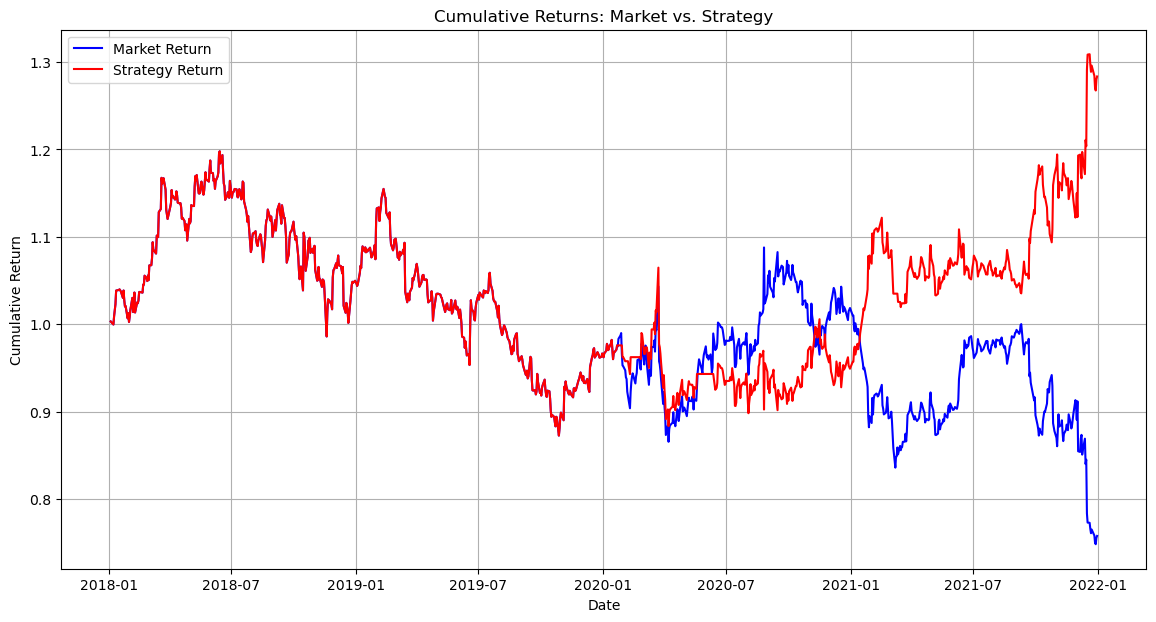

Final Market Return: -24.21%
Final Strategy Return: 28.35%


In [18]:
# Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Cumulative Return'], label='Market Return', color='blue')
plt.plot(data.index, data['Cumulative Strategy Return'], label='Strategy Return', color='red')
plt.title('Cumulative Returns: Market vs. Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

# Print final cumulative returns
market_return_percentage = data['Cumulative Return'].iloc[-1] * 100
strategy_return_percentage = data['Cumulative Strategy Return'].iloc[-1] * 100
print(f'Final Market Return: {-100+market_return_percentage:.2f}%')
print(f'Final Strategy Return: {-100+strategy_return_percentage:.2f}%')



In [19]:
# Calculate drawdown for market return
data['Cumulative Return Peak'] = data['Cumulative Return'].cummax()
data['Drawdown'] = (data['Cumulative Return'] - data['Cumulative Return Peak']) / data['Cumulative Return Peak']

# Calculate drawdown for strategy return
data['Cumulative Strategy Return Peak'] = data['Cumulative Strategy Return'].cummax()
data['Strategy Drawdown'] = (data['Cumulative Strategy Return'] - data['Cumulative Strategy Return Peak']) / data['Cumulative Strategy Return Peak']


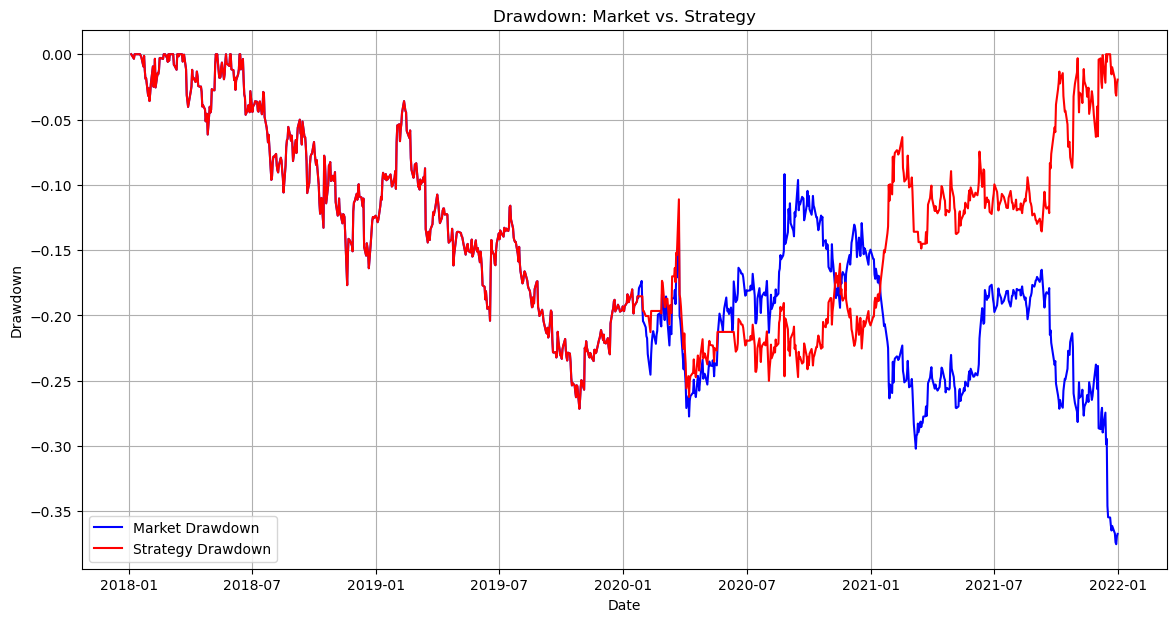

Maximum Market Drawdown: -37.52%
Maximum Strategy Drawdown: -27.15%


In [20]:
# Plot drawdown
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Drawdown'], label='Market Drawdown', color='blue')
plt.plot(data.index, data['Strategy Drawdown'], label='Strategy Drawdown', color='red')
plt.title('Drawdown: Market vs. Strategy')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

# Print maximum drawdown
max_market_drawdown = data['Drawdown'].min()
max_strategy_drawdown = data['Strategy Drawdown'].min()
print(f'Maximum Market Drawdown: {max_market_drawdown * 100:.2f}%')
print(f'Maximum Strategy Drawdown: {max_strategy_drawdown * 100:.2f}%')

Price      Long Signal Short Signal
Ticker                             
Date                               
2021-12-27       False        False
2021-12-28       False        False
2021-12-29       False        False
2021-12-30       False        False
2021-12-31       False        False
Price      Return_ADBE Return_MSFT Strategy_Return
Ticker                                            
Date                                              
2021-12-27    0.014150    0.023186             0.0
2021-12-28   -0.014402   -0.003504             0.0
2021-12-29   -0.000123    0.002051             0.0
2021-12-30    0.002178   -0.007691             0.0
2021-12-31   -0.006082   -0.008841             0.0


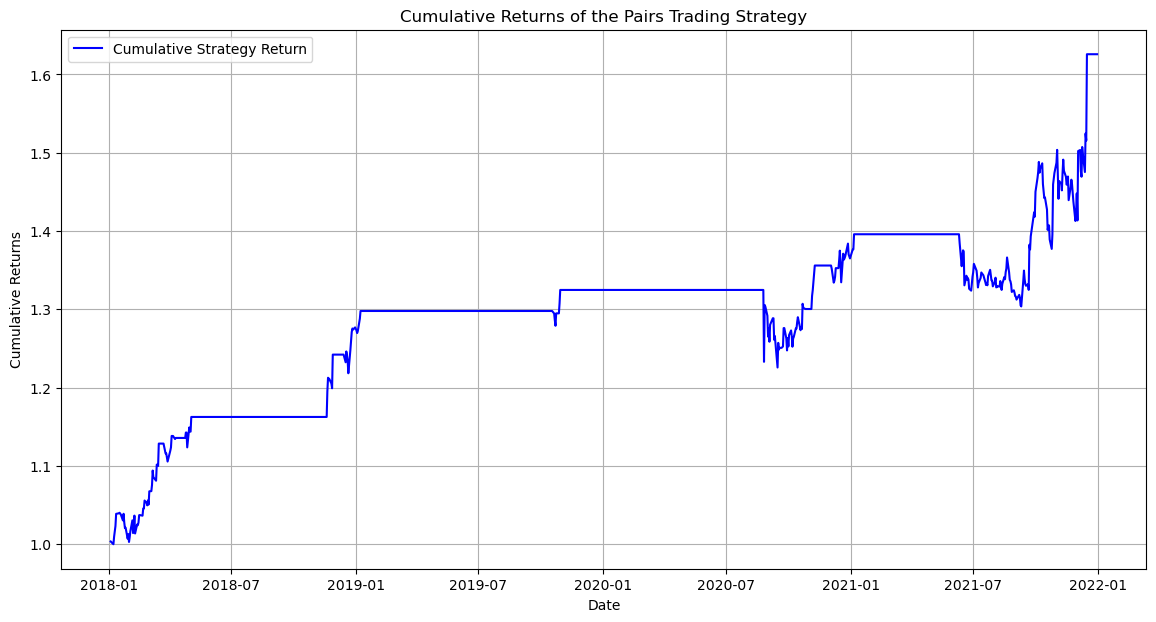

In [21]:
# Signal Generation
data['Long Signal'] = (data['Z-Score'] <= -1)
data['Short Signal'] = (data['Z-Score'] >= 1)

# Ensure signals are generated correctly
print(data[['Long Signal', 'Short Signal']].tail())

# Calculate daily returns for each stock
data['Return_ADBE'] = data['Adj Close']['ADBE'].pct_change()
data['Return_MSFT'] = data['Adj Close']['MSFT'].pct_change()

# Calculate the strategy's returns
data['Strategy_Return'] = np.where(data['Long Signal'].shift(1), data['Return_ADBE'] - data['Return_MSFT'],
                                   np.where(data['Short Signal'].shift(1), data['Return_MSFT'] - data['Return_ADBE'], 0))

# Ensure strategy returns are calculated correctly
print(data[['Return_ADBE', 'Return_MSFT', 'Strategy_Return']].tail())

# Cumulative returns
data['Cumulative_Strategy_Return'] = (1 + data['Strategy_Return']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Cumulative_Strategy_Return'], label='Cumulative Strategy Return', color='blue')
plt.title('Cumulative Returns of the Pairs Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
# Calculate performance metrics
cumulative_return = data['Cumulative_Strategy_Return'].iloc[-1] - 1
annualized_return = data['Strategy_Return'].mean() * 252
annualized_volatility = data['Strategy_Return'].std() * np.sqrt(252)
sharpe_ratio = annualized_return / annualized_volatility

print(f'Cumulative Return: {cumulative_return:.2f}')
print(f'Annualized Return: {annualized_return:.2f}')
print(f'Annualized Volatility: {annualized_volatility:.2f}')
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')

Cumulative Return: 0.63
Annualized Return: 0.13
Annualized Volatility: 0.12
Sharpe Ratio: 1.11


#  BackTesting


In [23]:

# Load historical data for ADBE and MSFT
tickers = ['ADBE', 'MSFT']
data = yf.download(tickers, start='2015-01-01', end='2016-01-01')

# Calculate the price ratio (or spread) between ADBE and MSFT
data = data.dropna()
data['Ratio'] = data['Adj Close']['ADBE'] / data['Adj Close']['MSFT']

# Compute rolling mean and standard deviation of the ratio (spread)
lookback_period = 50
data['Rolling Mean'] = data['Ratio'].rolling(window=lookback_period).mean()
data['Rolling Std'] = data['Ratio'].rolling(window=lookback_period).std()

# Calculate Z-score of the spread
data['Z-Score'] = (data['Ratio'] - data['Rolling Mean']) / data['Rolling Std']


[*********************100%%**********************]  2 of 2 completed


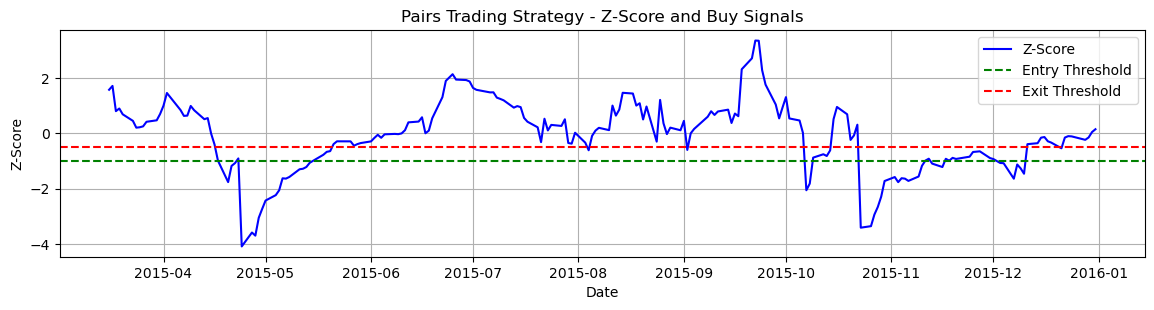

In [24]:

# Define entry and exit thresholds
entry_threshold = 1.0
exit_threshold = 0.5

# Initialize variables for tracking positions and PnL
data['Position ADBE'] = 0
data['Position MSFT'] = 0
data['Strategy Return'] = 0.0
data['Cumulative Strategy Return'] = 1.0

# Implement the pairs trading strategy
for i in range(1, len(data)):
    if data['Z-Score'].iloc[i-1] < -entry_threshold and data['Z-Score'].iloc[i] >= -entry_threshold:
        # Enter positions: Long ADBE, Short MSFT
        data.loc[data.index[i], 'Position ADBE'] = 1
        data.loc[data.index[i], 'Position MSFT'] = -1
    elif data['Z-Score'].iloc[i-1] > -exit_threshold and data['Z-Score'].iloc[i] <= -exit_threshold:
        # Exit positions
        data.loc[data.index[i], 'Position ADBE'] = 0
        data.loc[data.index[i], 'Position MSFT'] = 0
    
    # Calculate strategy returns based on position changes
    data.loc[data.index[i], 'Strategy Return'] = (
        data['Position ADBE'].iloc[i] * (data['Adj Close']['ADBE'].iloc[i] - data['Adj Close']['ADBE'].iloc[i-1]) +
        data['Position MSFT'].iloc[i] * (data['Adj Close']['MSFT'].iloc[i-1] - data['Adj Close']['MSFT'].iloc[i])
    )
    
    # Calculate cumulative strategy return
    data.loc[data.index[i], 'Cumulative Strategy Return'] = (
        data['Cumulative Strategy Return'].iloc[i-1] * (1 + data['Strategy Return'].iloc[i])
    )

# Plot buy signals, market return percentage, and strategy return percentage
plt.figure(figsize=(14, 10))

# Plot buy signals (based on Z-score thresholds)
plt.subplot(3, 1, 1)
plt.plot(data.index, data['Z-Score'], label='Z-Score', color='blue')
plt.axhline(y=-entry_threshold, color='green', linestyle='--', label='Entry Threshold')
plt.axhline(y=-exit_threshold, color='red', linestyle='--', label='Exit Threshold')
plt.title('Pairs Trading Strategy - Z-Score and Buy Signals')
plt.xlabel('Date')
plt.ylabel('Z-Score')
plt.legend()
plt.grid(True)


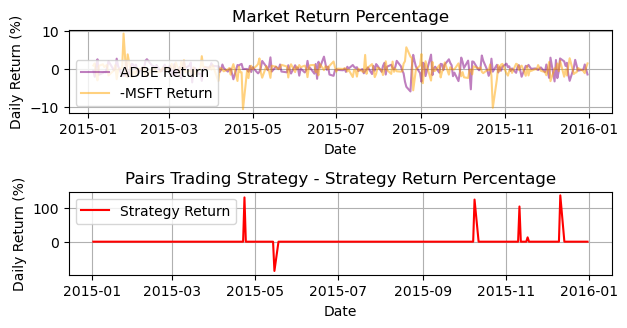

Final Market Return Percentage: 29.86%
Final Strategy Return Percentage: 262.83%


In [25]:

# Calculate market return percentage
market_return_adbe = data['Adj Close']['ADBE'].pct_change() * 100
market_return_msft = -data['Adj Close']['MSFT'].pct_change() * 100

# Plot market return percentage
plt.subplot(3, 1, 2)
plt.plot(data.index, market_return_adbe, label='ADBE Return', color='purple', alpha=0.5)
plt.plot(data.index, market_return_msft, label='-MSFT Return', color='orange', alpha=0.5)
plt.title('Market Return Percentage')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.grid(True)

# Calculate strategy return percentage
strategy_return_percentage = data['Strategy Return'] * 100

# Plot strategy return percentage
plt.subplot(3, 1, 3)
plt.plot(data.index, strategy_return_percentage, label='Strategy Return', color='red')
plt.title('Pairs Trading Strategy - Strategy Return Percentage')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print final percentages over the period
final_market_return = (data['Adj Close']['ADBE'].iloc[-1] / data['Adj Close']['ADBE'].iloc[0] - 1) * 100
final_strategy_return = (data['Cumulative Strategy Return'].iloc[-1] - 1) * 100

print(f'Final Market Return Percentage: {final_market_return:.2f}%')
print(f'Final Strategy Return Percentage: {final_strategy_return:.2f}%')


Price      Long Signal Short Signal
Ticker                             
Date                               
2015-12-24       False        False
2015-12-28       False        False
2015-12-29       False        False
2015-12-30       False        False
2015-12-31       False        False
Price      Return_ADBE Return_MSFT Strategy_Return
Ticker                                            
Date                                              
2015-12-24   -0.004224   -0.002687             0.0
2015-12-28   -0.001061    0.005029             0.0
2015-12-29    0.011996    0.010724             0.0
2015-12-30   -0.000525   -0.004244             0.0
2015-12-31   -0.014064   -0.014740             0.0


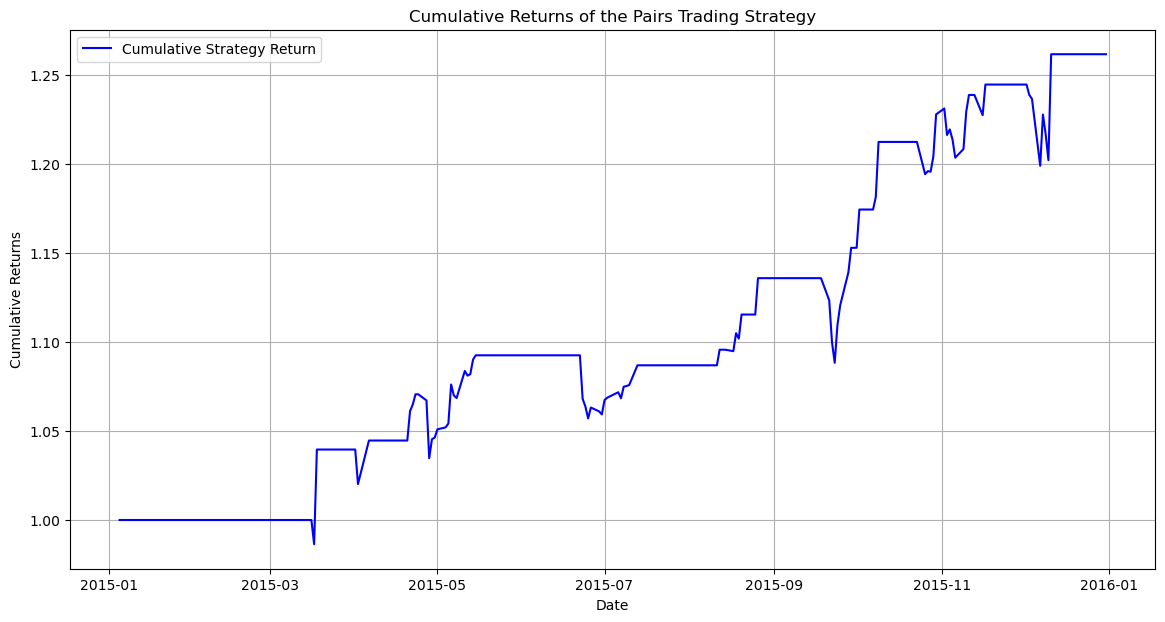

Cumulative Return: 0.26
Annualized Return: 0.24
Annualized Volatility: 0.13
Sharpe Ratio: 1.92


In [26]:
# Signal Generation
data['Long Signal'] = (data['Z-Score'] <= -1)
data['Short Signal'] = (data['Z-Score'] >= 1)

# Ensure signals are generated correctly
print(data[['Long Signal', 'Short Signal']].tail())

# Calculate daily returns for each stock
data['Return_ADBE'] = data['Adj Close']['ADBE'].pct_change()
data['Return_MSFT'] = data['Adj Close']['MSFT'].pct_change()

# Calculate the strategy's returns
data['Strategy_Return'] = np.where(data['Long Signal'].shift(1), data['Return_ADBE'] - data['Return_MSFT'],
                                   np.where(data['Short Signal'].shift(1), data['Return_MSFT'] - data['Return_ADBE'], 0))

# Ensure strategy returns are calculated correctly
print(data[['Return_ADBE', 'Return_MSFT', 'Strategy_Return']].tail())

# Cumulative returns
data['Cumulative_Strategy_Return'] = (1 + data['Strategy_Return']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Cumulative_Strategy_Return'], label='Cumulative Strategy Return', color='blue')
plt.title('Cumulative Returns of the Pairs Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# Calculate performance metrics
cumulative_return = data['Cumulative_Strategy_Return'].iloc[-1] - 1
annualized_return = data['Strategy_Return'].mean() * 252
annualized_volatility = data['Strategy_Return'].std() * np.sqrt(252)
sharpe_ratio = annualized_return / annualized_volatility

print(f'Cumulative Return: {cumulative_return:.2f}')
print(f'Annualized Return: {annualized_return:.2f}')
print(f'Annualized Volatility: {annualized_volatility:.2f}')
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')
